In [2]:
import tensorflow as tf
import json
import numpy as np
import seaborn as sns
from src import preparedata
from src import modelinsar
from src import traininsar
import matplotlib.pyplot as plt
print("json imported")

json imported


In [3]:
params=json.load(open('params/params.json','r'))
dataset=preparedata.readInsarData(params['dataprepinargs'])
dataset.preparedata()

In [4]:
dataset.Xtrain.shape

(11310, 11)

<AxesSubplot: ylabel='Count'>

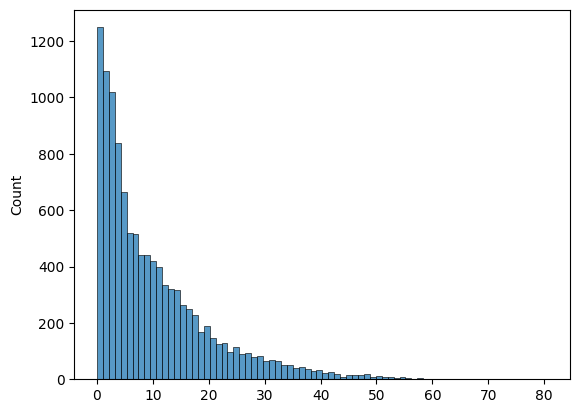

In [5]:
sns.histplot(dataset.Ytrain)


In [6]:
landslidehazard=modelinsar.insarpred(params['modelparam'])
landslidehazard.preparemodel()

traininsar.trainmodel(landslidehazard.model,dataset.Xtrain,np.abs(dataset.Ytrain),params['trainparam'])

2023-06-08 11:19:03.888512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 11:19:04.754576: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10404 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:88:00.0, compute capability: 6.1


Epoch 1/500


354/354 [==============================] - 4s 8ms/step


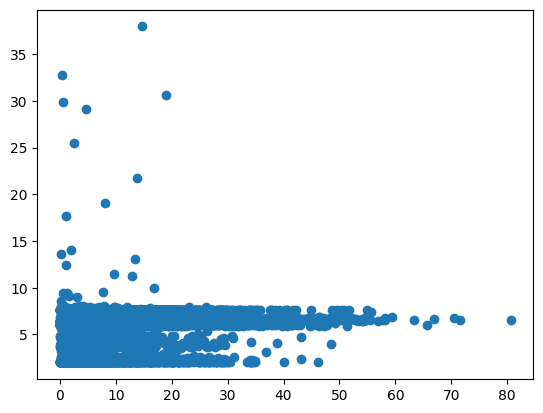

In [ ]:
plt.scatter(x=dataset.Ytrain.flatten(),y=landslidehazard.model.predict(dataset.Xtrain).flatten())
# plt.xlim(4,5)
# plt.ylim(4,5)